In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sympy
import random

In [2]:
x = sympy.Symbol('x')
y = sympy.Symbol('y')

In [3]:
fun = x**2*y+2*x**4-2*x**2-2/3*y**3+y**2
dx = sympy.diff(fun,x)
dy = sympy.diff(fun,y)
dxx = sympy.diff(dx,x)
dyy = sympy.diff(dy,y)
dxy = sympy.diff(dx,y)

In [4]:
b1 = sympy.Eq(dx,0)
b2 = sympy.Eq(dy,0)
punkty = sympy.solve([b1,b2],(x,y))

In [5]:
punkty

[(-0.746137405793316, -0.226884113295916),
 (-0.473844881449638, 1.10188411329592),
 (0.0, 0.0),
 (0.0, 1.00000000000000),
 (0.473844881449638, 1.10188411329592),
 (0.746137405793316, -0.226884113295916)]

In [6]:
def w(x,y):
    return dxx*dyy-dxy*dxy

In [7]:
w(x,y)

-4*x**2 + (2 - 4.0*y)*(24*x**2 + 2*y - 4)

In [8]:
in_dict = {"x":punkty[0][0],"y":punkty[0][1]}
x, y= sympy.symbols('x y ')
sympy.sympify(w(x,y)).evalf(subs={x:in_dict['x'], y:in_dict['y']})

23.6721028323979

In [9]:
opisy =[]
wyznacznik = []
for i in range(0,len(punkty)):
    in_dict = {"x":punkty[i][0],"y":punkty[i][1]}
    x, y= sympy.symbols('x y ')
    wyznacznik.append(sympy.sympify(w(x,y)).evalf(subs={x:in_dict['x'], y:in_dict['y']}))
    if (wyznacznik[i]>0):
        opisy.append('ekstremum')
    if (wyznacznik[i]<0):
        opisy.append('krytyczny')
    if(wyznacznik[i]==0):
        opisy.append('nie rozstrzyga')

In [10]:
opisy

['ekstremum', 'krytyczny', 'krytyczny', 'ekstremum', 'krytyczny', 'ekstremum']

In [11]:
wyznacznik

[23.6721028323979,
 -9.54710283239789,
 -8.00000000000000,
 4.00000000000000,
 -9.54710283239789,
 23.6721028323979]

In [12]:
opisy1 = opisy.copy()

In [13]:
opisy1

['ekstremum', 'krytyczny', 'krytyczny', 'ekstremum', 'krytyczny', 'ekstremum']

In [14]:
for i in range(0,len(opisy)):
    if (opisy[i]=='ekstremum'):
        in_dict = {"x":punkty[i][0],"y":punkty[i][1]}
        x, y= sympy.symbols('x y ')
        a = sympy.sympify(dxx).evalf(subs={x:in_dict['x'], y:in_dict['y']})
        if(a>0):
            opisy1[i] = 'minimum'
        if(a<0):
            opisy1[i] = 'maksimum'

In [15]:
opisy1

['minimum', 'krytyczny', 'krytyczny', 'maksimum', 'krytyczny', 'minimum']

In [16]:
punktyx = []
for i in range(0,len(punkty)):
    punktyx.append(punkty[i][0])
punktyy = []
for i in range(0,len(punkty)):
    punktyy.append(punkty[i][1])

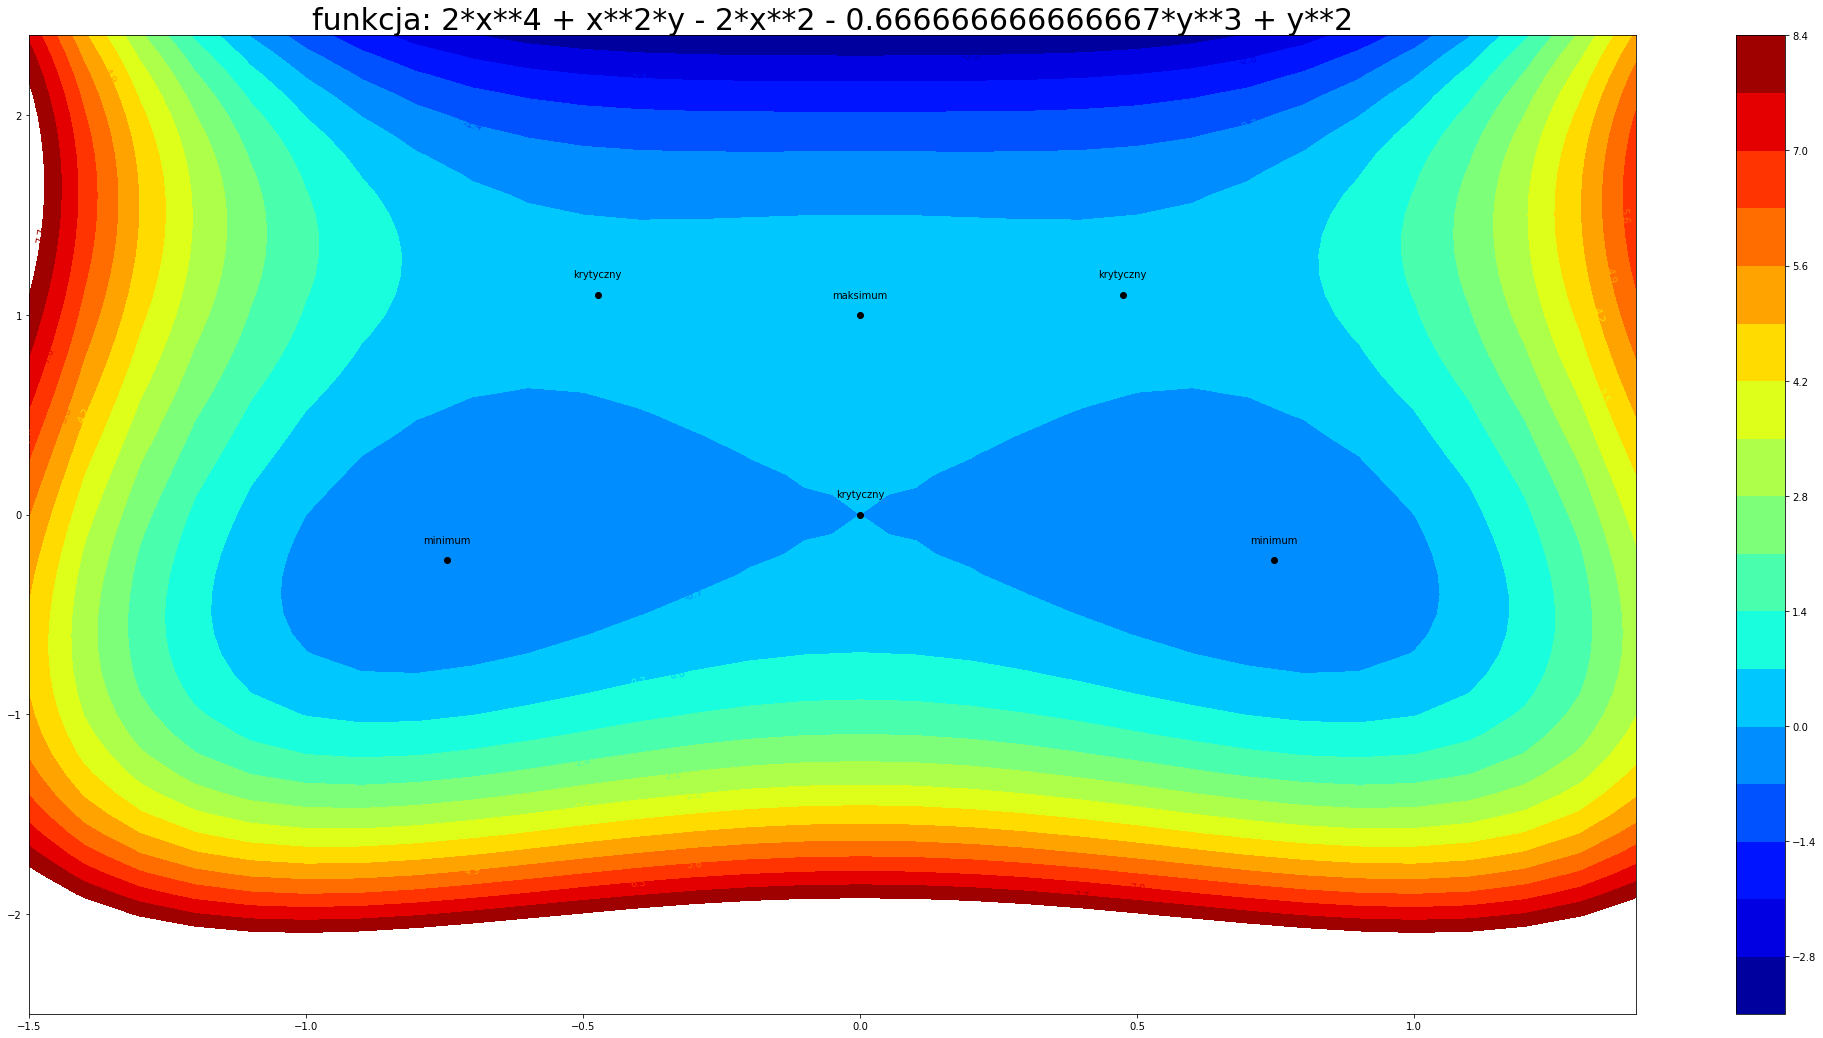

In [17]:
def f(x,y):
    return (x**2*y+2*x**4-2*x**2-2/3*y**3+y**2)

x = np.arange(-1.5,1.5,0.1)
y = np.arange(-2.5,2.5,0.1)


X,Y = np.meshgrid(x,y)
Z = f(X,Y)

fig = plt.figure(figsize=(36,18))
ax = fig.add_subplot()

N = np.arange(-3.5,8.5,0.7)
plt.plot(punktyx,punktyy,'o',color='black')
for i in range(0,len(punkty)):
    plt.annotate(opisy1[i], xy =(punktyx[i], punktyy[i] + 0.1),ha="center", va="center",
                xytext =(punktyx[i] , punktyy[i] + 0.1))
CS = plt.contourf(X,Y,Z,N, cmap ='jet')
plt.clabel(CS,inline = False, fmt = '%1.1f', fontsize = 10)
plt.colorbar(CS)
plt.title('funkcja: ' + str(fun),fontsize = 30)
plt.savefig('09_Tab_272348')
plt.show()